In [4]:
import bql
import numpy as np
from IPython.display import display, clear_output
import pandas as pd
import time 
import datetime
from ipywidgets import *
from bqplot import *
from bqplot.interacts import *

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

bq = bql.Service()
d = bq.data
f = bq.func
u = bq.univ

In [5]:
# INPUTS ###############

fi_fut_idx = ['RX1 Comdty', 'TY1 Comdty', 'US1 Comdty', 'TU1 Comdty', 'FV1 Comdty', 'ED1 Comdty', 'IK1 Comdty', 'JB1 Comdty', 'OE1 Comdty', 'G 1 Comdty',
              'WN1 Comdty', 'XM1 Comdty', 'DU1 Comdty', 'UB1 Comdty', 'CN1 Comdty', 'YM1 Comdty', 'OD1 Comdty', 'BTS1 Comdty', 'L 1 Comdty', 'FF1 Comdty',
              'IR1 Comdty', 'YE1 Comdty', 'ER1 Comdty', 'ES1 Comdty', 'IB1 Comdty', 'BA1 Comdty', 'KAA1 Comdty', '0E1 Comdty', 'BJ1 Comdty', 'KE1 Comdty',
              'XQ1 Comdty', 'FB1 Comdty', 'RXR1 Comdty', 'ZB1 Comdty', 'EDE1 Comdty', 'TYT1 Comdty', '2E1 Comdty']

index_universe = ['HFRIFOF Index'] + fi_fut_idx

start_date = datetime.datetime(2008,12,31)
end_date = datetime.datetime(2018,12,31)

In [25]:
def norm_corr(as1, as2, st_date, e_date):
    price = d.px_last(start = st_date, end = e_date, per = 'M', fill='prev')
    base_price = f.value(price, u.list(as1))
    cond = f.or_(price==np.nan, base_price==np.nan)
    val_1 = f.zscore(f.dropna(f.if_(cond, np.nan, price)))
    val_2 = f.zscore(f.dropna(f.if_(cond, np.nan, base_price)))
    correlation = f.corr(val_1, val_2)
    
#     price = f.zscore(price)
#     base_price = f.value(price, u.list(as1))
#     correlation = f.corr(base_price, price)

    request = bql.Request(as2, {'Cor': correlation}, preferences={'currencycheck':'ignore'}) #There's an error with de currencies of these tickers. This way we "solve" the issue
    res = bq.execute(request)
    cor_res = res[0].df()
    
    return cor_res.iloc[0]['Cor']

def correlDist(corr):
    dist = ((1-corr)/2)**0.5
    return dist

In [4]:
# ###############    MAIN    ###############

# #Calculate Cluster
# count = 0
# for asset1 in index_universe:
#     aux_cor_list=[]
#     for asset2 in index_universe:
#         aux_cor_list.append(norm_corr(asset1,asset2,start_date,end_date))
        
#     if count == 0:
#         Correl_Matrix = pd.DataFrame({asset1: pd.Series(aux_cor_list, index = index_universe)})
#     else:
#         aux_Correl_Matrix = pd.DataFrame({asset1: pd.Series(aux_cor_list, index = index_universe)})
#         Correl_Matrix = pd.concat([Correl_Matrix, aux_Correl_Matrix],axis = 1)
        
#     count += 1

# Z = linkage(correlDist(Correl_Matrix))

# plt.figure(figsize=(30, 10), facecolor='w')
# dendrogram(Z, labels = index_universe)
# plt.show()

In [26]:
###############    MAIN    ###############

#Calculate Cluster
list_idx = []
aux_cor_list=[]
for asset2 in index_universe:
    try:
        aux_cor_list.append(norm_corr('HFRIFOF Index',asset2,start_date,end_date))
        list_idx.append(asset2)
    except:
        continue
    
Correl_Matrix = pd.DataFrame({'HFRIFOF Index': pd.Series(aux_cor_list, index = list_idx)})
Correl_Matrix

HFRIFOF Index
HFRIFOF Index       1.000000
RX1 Comdty          0.859203
TY1 Comdty         -0.015326
US1 Comdty          0.584666
TU1 Comdty         -0.564092
FV1 Comdty         -0.378298
ED1 Comdty         -0.544313
IK1 Comdty               NaN
JB1 Comdty          0.874592
OE1 Comdty          0.832089
G 1 Comdty          0.170287
WN1 Comdty               NaN
XM1 Comdty          0.720284
DU1 Comdty          0.813083
UB1 Comdty          0.841855
CN1 Comdty          0.607930
YM1 Comdty          0.690958
OD1 Comdty         -0.044822
BTS1 Comdty              NaN
L 1 Comdty          0.552085
FF1 Comdty         -0.658006
IR1 Comdty          0.728024
YE1 Comdty          0.911751
ER1 Comdty          0.832757
ES1 Comdty          0.852116
IB1 Comdty          0.805099
BA1 Comdty         -0.530491
KAA1 Comdty              NaN
0E1 Comdty               NaN
BJ1 Comdty          0.874259
KE1 Comdty          0.041996
XQ1 Comdty               NaN
FB1 Comdty          0.790042
RXR1 Comdty         0.721850
ZB1 Comdty          0.434135
EDE1 Comdty              NaN
TYT1 Comdty              NaN
2E1 Comdty               NaN

In [5]:
def norm_corr2(as1, as2, st_date, e_date):
    price = f.dropna(d.px_last(start = st_date, end = e_date, per = 'M', fill='prev'))
    price = f.zscore(price)
    base_price = f.dropna(f.value(price, u.list(as1)))
    correlation = f.corr(base_price, price)
    
    request = bql.Request(as2, {'Cor': correlation}, preferences={'currencycheck':'ignore'}) #There's an error with de currencies of these tickers. This way we "solve" the issue
    res = bq.execute(request)
    cor_res = res[0].df()
    
    return cor_res.iloc[0]['Cor']

norm_corr2('HFRIFOF Index','IK1 Comdty',start_date,end_date)

0.85920688288084679

In [12]:
price = d.px_last(start = start_date, end = end_date, per = 'M', fill='prev')
price = f.zscore(price)
base_price = f.value(price, u.list('HFRIFOF Index'))
mse = f.sum(f.pow(f.add(base_price,-price),2))/f.count(base_price)

request = bql.Request('OE1 Comdty', {'MSE': mse}, preferences={'currencycheck':'ignore'}) #There's an error with de currencies of these tickers. This way we "solve" the issue
res = bq.execute(request)
res[0].df()

DATE CURRENCY       MSE
ID                                      
OE1 Comdty 2018-12-31     None  0.333039

In [13]:
price = d.px_last(start = start_date, end = end_date, per = 'M', fill='prev')
price = f.zscore(price)
base_price = f.value(price, u.list('HFRIFOF Index'))
# mse = f.sum(f.pow(f.add(base_price,-price),2))/f.count(base_price)
mse = f.pow(f.populationstd(f.add(base_price,-price)),2)

request = bql.Request('OE1 Comdty', {'MSE': mse}, preferences={'currencycheck':'ignore'}) #There's an error with de currencies of these tickers. This way we "solve" the issue
res = bq.execute(request)
res[0].df()

DATE CURRENCY       MSE
ID                                      
OE1 Comdty 2018-12-31     None  0.333039

In [25]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha = 0.1).fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])


array([ 0.15,  1.  ,  1.85])

0.969756321807


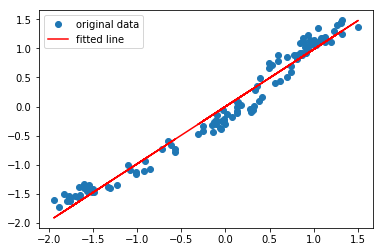

In [33]:
import matplotlib.pyplot as plt
from scipy import stats

HFRIFOF = [-1.374853161,-1.539135908,-1.384164734,-1.402122767,-1.528494111,-1.728027812,-1.624935399,-1.561084615,-1.521842987,-1.571726413,-1.570396188,-1.455331754,-1.617619164,-1.471959562,-1.400792542,-1.473954899,-1.374188049,-1.111468676,-1.072227048,-1.128096484,-0.73701043,-0.936544131,-1.082868845,-1.163347438,-1.343592881,-1.448015518,-1.422741249,-1.611633153,-1.50255473,-1.340932432,-1.332285971,-1.007711151,-0.72836397,-0.599997289,-0.667838747,-0.777582283,-0.430393643,-0.385166004,-0.373859095,-0.466974822,-0.294045614,0.03451988,-0.306682749,-0.062586521,-0.0991677,-0.248817975,-0.254803986,-0.180976517,0.008580499,-0.240171515,-0.034651803,-0.001396186,0.071101058,-0.119786182,-0.265445784,-0.208911235,-0.322645445,-0.333287242,-0.233520392,-0.252808649,-0.421747183,-0.108479272,-0.075223656,-0.141734889,-0.064581858,0.086398642,0.099700889,0.164881898,0.400996777,0.278616107,0.3590947,0.488126493,0.688990419,0.923109961,0.927765748,0.881207884,0.744194743,0.659725476,0.431591945,0.591218906,0.504089189,0.710274014,0.778115472,0.851277829,0.825338448,1.186494447,1.401325731,1.18449911,1.088722933,1.227731411,1.437241797,1.483134549,1.454534718,1.342795846,1.108011191,1.034183722,1.239703434,1.105350742,1.366074777,1.058127766,1.08207181,1.117987876,1.088057821,1.09337872,1.301558881,1.03085816,1.146587706,1.144592369,1.075420686,0.885198558,0.926435523,0.925770411,0.87987766,1.106015854,1.13328546,1.068769563,1.181173548,0.883203221,0.980974735,1.066109114,1.199131581]
OE1 = [-1.662352283,-1.767438163,-1.563246901,-1.601692954,-1.701652694,-1.881067611,-1.792214509,-1.672604564,-1.648682575,-1.775127374,-1.76316638,-1.568373041,-1.756331526,-1.482937367,-1.30352245,-1.51369421,-1.329153152,-0.9173532,-0.859256942,-1.009623729,-0.568775648,-0.910518346,-1.076263555,-1.009623729,-1.223212916,-1.55812076,-1.496607075,-1.942581296,-1.828097492,-1.542742339,-1.599129884,-1.098476831,-0.717433722,-0.650793895,-0.614910912,-0.565358221,-0.141597274,-0.054452886,-0.057870313,-0.312468624,-0.109131718,0.172806008,-0.008317622,0.309503088,0.287289812,-0.042491892,-0.018569903,0.075409339,0.321464082,-0.044200605,0.280454958,0.133505598,0.135214312,0.015604367,-0.126218853,-0.020278616,-0.148432128,-0.256081078,-0.110840431,-0.109131718,-0.257789792,0.135214312,0.130088171,-0.097170724,-0.028822184,0.143757879,0.374434201,0.415443324,0.562392685,0.338551217,0.360764493,0.394938763,0.741807602,0.846039125,0.895591816,0.596566955,0.488918005,0.497461572,0.622197657,0.746933742,0.699089764,0.526509702,0.594858241,0.699089764,0.808447428,1.109181003,1.262965217,0.881922108,0.839204271,0.929766086,1.309100481,1.321061476,1.307391768,1.051084744,0.883630822,0.938309653,1.314226622,1.196325391,1.502185106,1.001532053,1.011784334,1.068171879,0.984444918,1.045958604,1.230499661,0.895591816,0.998114626,0.951979361,0.969066496,0.770855731,0.871669827,0.907552811,0.864834973,1.126268138,1.064754452,0.969066496,1.07842416,0.813573568,0.940018367,1.030580182,1.124559424]

slope, intercept, r_value, p_value, std_err = stats.linregress(OE1, HFRIFOF)
print(r_value**2)
plt.plot(OE1, HFRIFOF, 'o', label='original data')
plt.plot(OE1, intercept + slope*OE1, 'r', label='fitted line')
plt.legend()
plt.show()

C:\blp\BQuant\environments\bqnt-1.8.1\lib\site-packages\bqnb\kernelapp.py:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\blp\BQuant\environments\bqnt-1.8.1\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\blp\BQuant\environments\bqnt-1.8.1\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


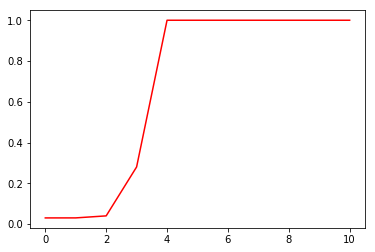

In [23]:
import matplotlib.pyplot as plt
from sklearn import linear_model

HFRIFOF = [-1.374853161,-1.539135908,-1.384164734,-1.402122767,-1.528494111,-1.728027812,-1.624935399,-1.561084615,-1.521842987,-1.571726413,-1.570396188,-1.455331754,-1.617619164,-1.471959562,-1.400792542,-1.473954899,-1.374188049,-1.111468676,-1.072227048,-1.128096484,-0.73701043,-0.936544131,-1.082868845,-1.163347438,-1.343592881,-1.448015518,-1.422741249,-1.611633153,-1.50255473,-1.340932432,-1.332285971,-1.007711151,-0.72836397,-0.599997289,-0.667838747,-0.777582283,-0.430393643,-0.385166004,-0.373859095,-0.466974822,-0.294045614,0.03451988,-0.306682749,-0.062586521,-0.0991677,-0.248817975,-0.254803986,-0.180976517,0.008580499,-0.240171515,-0.034651803,-0.001396186,0.071101058,-0.119786182,-0.265445784,-0.208911235,-0.322645445,-0.333287242,-0.233520392,-0.252808649,-0.421747183,-0.108479272,-0.075223656,-0.141734889,-0.064581858,0.086398642,0.099700889,0.164881898,0.400996777,0.278616107,0.3590947,0.488126493,0.688990419,0.923109961,0.927765748,0.881207884,0.744194743,0.659725476,0.431591945,0.591218906,0.504089189,0.710274014,0.778115472,0.851277829,0.825338448,1.186494447,1.401325731,1.18449911,1.088722933,1.227731411,1.437241797,1.483134549,1.454534718,1.342795846,1.108011191,1.034183722,1.239703434,1.105350742,1.366074777,1.058127766,1.08207181,1.117987876,1.088057821,1.09337872,1.301558881,1.03085816,1.146587706,1.144592369,1.075420686,0.885198558,0.926435523,0.925770411,0.87987766,1.106015854,1.13328546,1.068769563,1.181173548,0.883203221,0.980974735,1.066109114,1.199131581]
OE1 = [-1.662352283,-1.767438163,-1.563246901,-1.601692954,-1.701652694,-1.881067611,-1.792214509,-1.672604564,-1.648682575,-1.775127374,-1.76316638,-1.568373041,-1.756331526,-1.482937367,-1.30352245,-1.51369421,-1.329153152,-0.9173532,-0.859256942,-1.009623729,-0.568775648,-0.910518346,-1.076263555,-1.009623729,-1.223212916,-1.55812076,-1.496607075,-1.942581296,-1.828097492,-1.542742339,-1.599129884,-1.098476831,-0.717433722,-0.650793895,-0.614910912,-0.565358221,-0.141597274,-0.054452886,-0.057870313,-0.312468624,-0.109131718,0.172806008,-0.008317622,0.309503088,0.287289812,-0.042491892,-0.018569903,0.075409339,0.321464082,-0.044200605,0.280454958,0.133505598,0.135214312,0.015604367,-0.126218853,-0.020278616,-0.148432128,-0.256081078,-0.110840431,-0.109131718,-0.257789792,0.135214312,0.130088171,-0.097170724,-0.028822184,0.143757879,0.374434201,0.415443324,0.562392685,0.338551217,0.360764493,0.394938763,0.741807602,0.846039125,0.895591816,0.596566955,0.488918005,0.497461572,0.622197657,0.746933742,0.699089764,0.526509702,0.594858241,0.699089764,0.808447428,1.109181003,1.262965217,0.881922108,0.839204271,0.929766086,1.309100481,1.321061476,1.307391768,1.051084744,0.883630822,0.938309653,1.314226622,1.196325391,1.502185106,1.001532053,1.011784334,1.068171879,0.984444918,1.045958604,1.230499661,0.895591816,0.998114626,0.951979361,0.969066496,0.770855731,0.871669827,0.907552811,0.864834973,1.126268138,1.064754452,0.969066496,1.07842416,0.813573568,0.940018367,1.030580182,1.124559424]

OE1 = np.array([[i] for i in OE1])
HFRIFOF = np.array([[i] for i in HFRIFOF])

list_alphas = [0, 0.01, 0.1, 0.5, 1, 10, 50, 100, 500, 1000, 100000]
list_errors = []

n = len(OE1)

for alphas in list_alphas:
    
    model = linear_model.Lasso(alpha = alphas).fit(OE1, HFRIFOF)
    error = 0
    for i in range(n):
        error += (model.predict([OE1[i]])[0] - HFRIFOF[i][0])**2/n
    
    list_errors.append(error)

plt.plot(range(len(list_errors)), list_errors, 'r')
plt.show()